ASSIGNMENT:EDA-2

Flight Price:

1.  Load the flight price dataset and examine its dimensions. How many rows and columns does the 
dataset have?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel("flight_price.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the 
distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

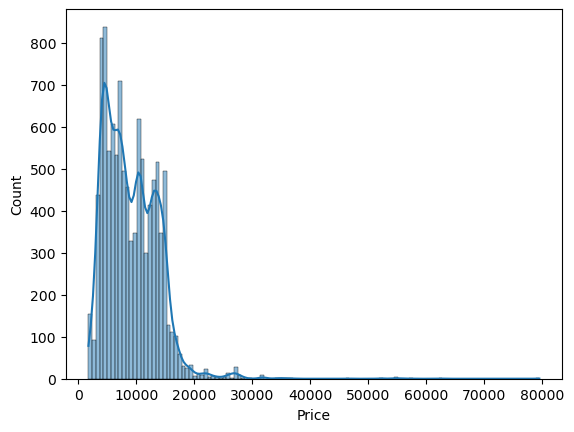

In [6]:
sns.histplot(df['Price'],kde=True)

3.  What is the range of prices in the dataset? What is the minimum and maximum price?

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
# max price = 79512,  min price = 1759

4.  How does the price of flights vary by airline? Create a boxplot to compare the prices of different 
airlines.

<AxesSubplot: xlabel='Airline', ylabel='Price'>

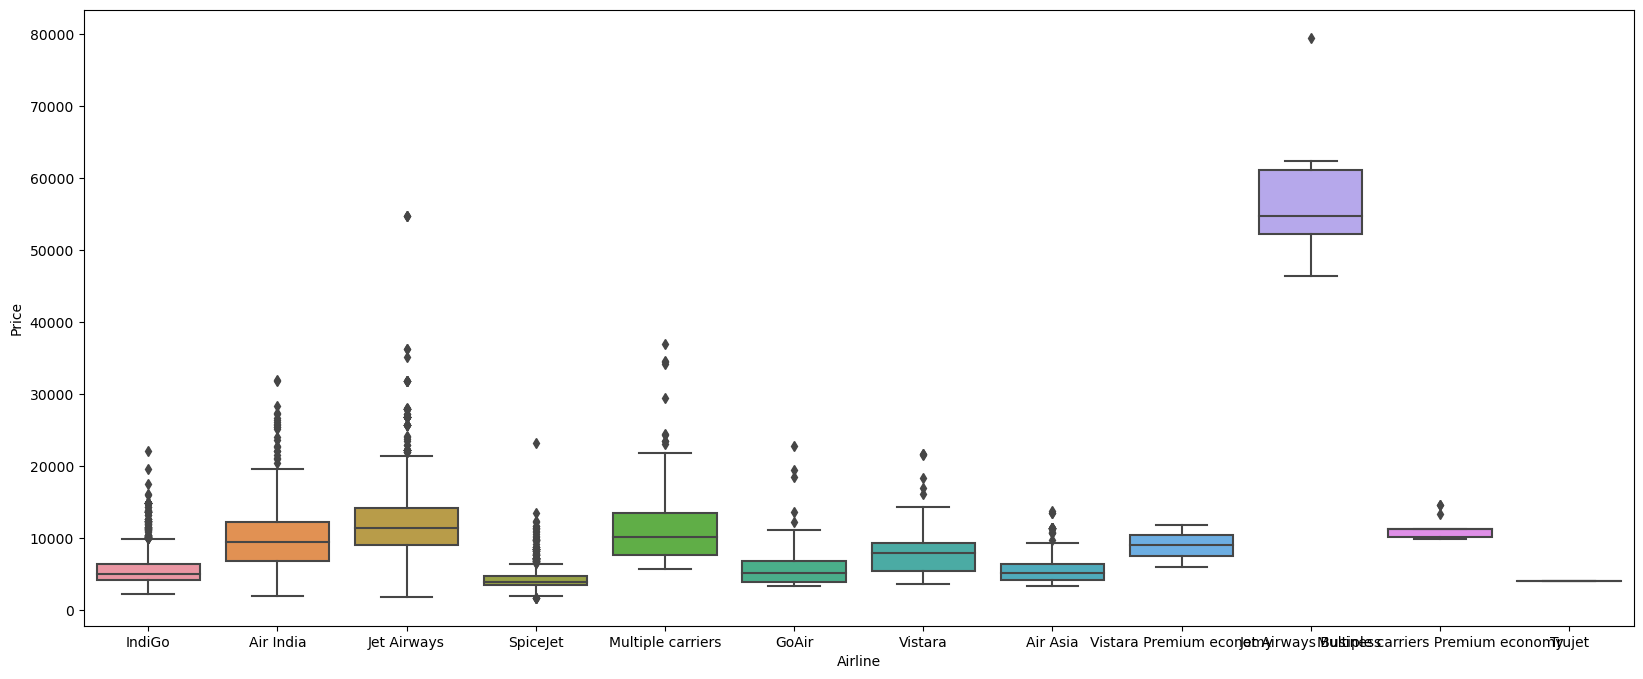

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))

sns.boxplot(x='Airline', y='Price', data=df)


5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how 
they may impact your analysis.

Yes, there are outliers in the data, that we see from the above box plot. They can further impact our analysis by driving towards wrong conclusions. Thus we remove them using suitable imputation method like mean, meadian imputations.

6.  You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset 
to identify the peak travel season. What features would you analyze to identify the peak season, and how 
would you present your findings to your boss?

In [10]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(10682, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [15]:
# Convert the 'Date of Journey' column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

# Extract the month from the 'Date of Journey' column
df['Month'] = df['Date_of_Journey'].dt.month

/tmp/ipykernel_84/3156829050.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [17]:
df['Month'].dtype

dtype('int64')

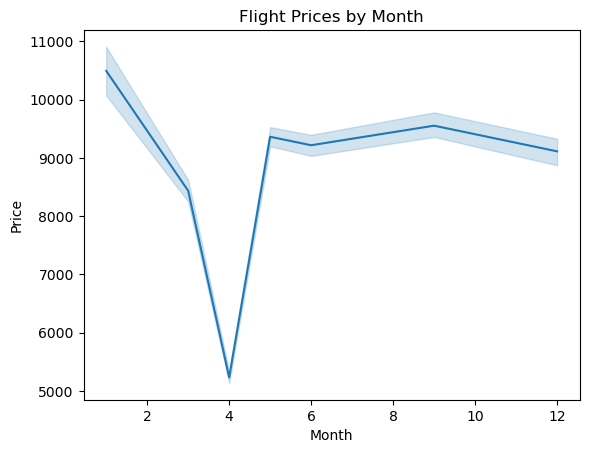

In [18]:
# Analyze flight prices by month
sns.lineplot(x='Month', y='Price', data=df)
plt.title('Flight Prices by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

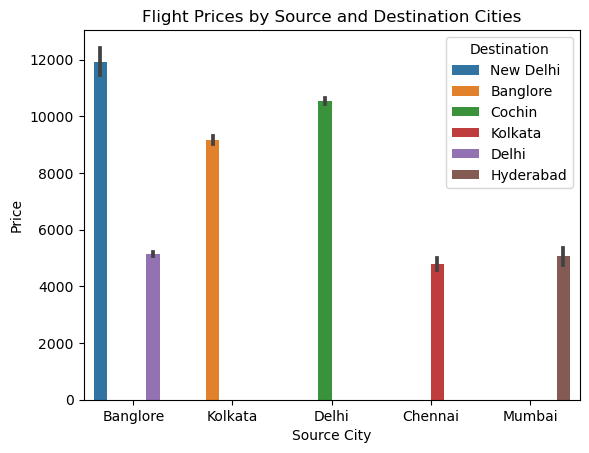

In [19]:
# Analyze flight prices by source and destination cities
sns.barplot(x='Source', y='Price', hue='Destination', data=df)
plt.title('Flight Prices by Source and Destination Cities')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.show()

<AxesSubplot: xlabel='Month', ylabel='Count'>

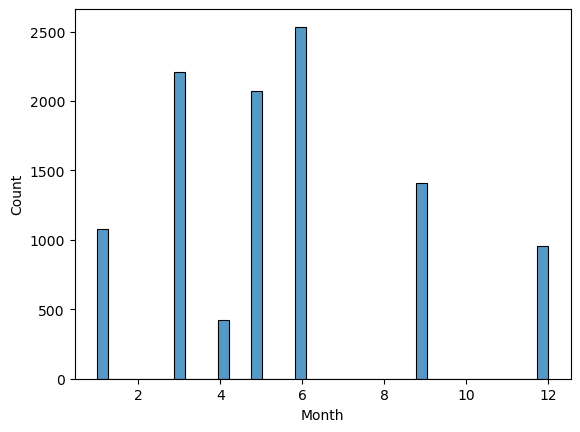

In [20]:
sns.histplot(df['Month'])

thus from above finding, we can definitely say that month of 6 i.e June is peak season of travelling fallowed by 3 i.e march.

7.  You are a data analyst for a flight booking website, and you have been asked to analyze the Flight 
Price dataset to identify any trends in flight prices. What features would you analyze to identify these 
trends, and what visualizations would you use to present your findings to your team?

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


<AxesSubplot: xlabel='Source', ylabel='Price'>

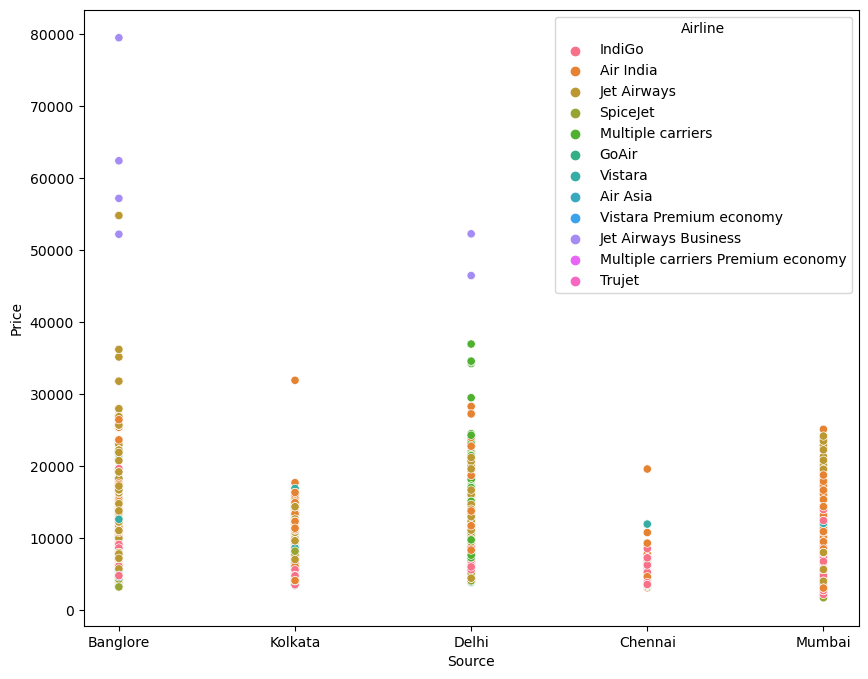

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='Source',y='Price',hue='Airline',data=df)

Flight sourcing from Banglore are the most expensive one, with jet airway business airlines

Flight sourcing from chennai are the cheapest one , with spicejet airlines

<AxesSubplot: xlabel='Month', ylabel='Price'>

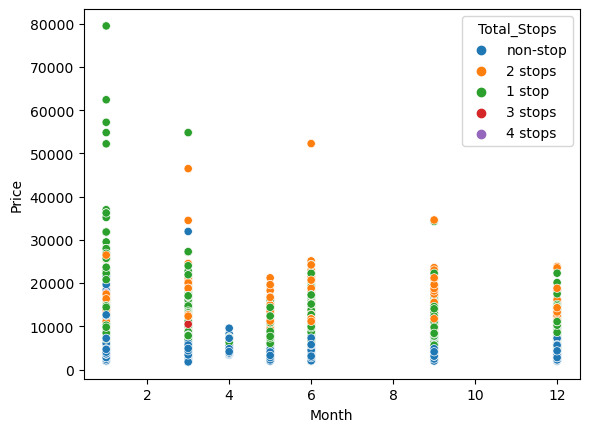

In [23]:
sns.scatterplot(x='Month',y='Price',hue='Total_Stops',data=df)

Flight is most expensive in the month of January.

Flight with generally no stop is the cheapest.



8. You are a data scientist working for an airline company, and you have been asked to analyze the 
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to 
identify these factors, and how would you present your findings to the management team?

In [24]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [25]:
df.corr()

/tmp/ipykernel_84/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Month
Price,1.000000,0.010705
Month,0.010705,1.000000


In [26]:

# Analyze prices by source and destination cities
city_prices = df.groupby(['Source', 'Destination'])['Price'].mean().reset_index()
city_prices

,Source,Destination,Price
0,Banglore,Delhi,5143.918577
1,Banglore,New Delhi,11917.716738
2,Chennai,Kolkata,4789.892388
3,Delhi,Cochin,10540.113536
4,Kolkata,Banglore,9158.389411
5,Mumbai,Hyderabad,5059.708752


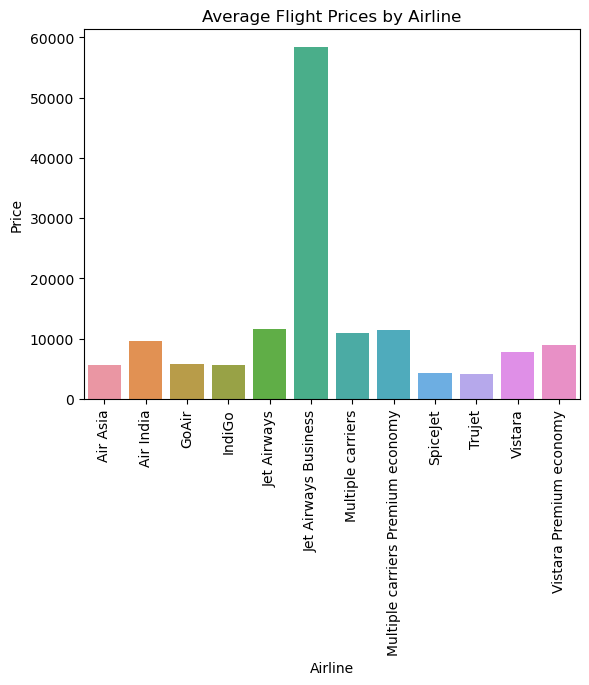

In [28]:
# Analyze prices by airline
airline_prices = df.groupby('Airline')['Price'].mean().reset_index()
sns.barplot(x='Airline', y='Price', data=airline_prices)
plt.title('Average Flight Prices by Airline')
plt.xticks(rotation=90)
plt.show()

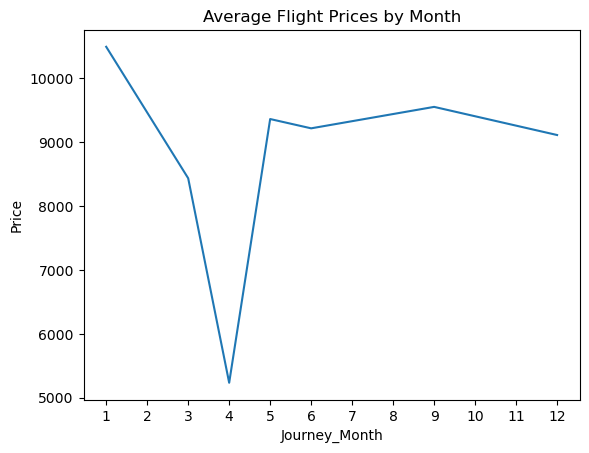

In [29]:
# Analyze prices by date of journey
df['Journey_Month'] = pd.to_datetime(df['Date_of_Journey']).dt.month
month_prices = df.groupby('Journey_Month')['Price'].mean().reset_index()

sns.lineplot(x='Journey_Month', y='Price', data=month_prices)
plt.title('Average Flight Prices by Month')
plt.xticks(range(1,13))
plt.show()


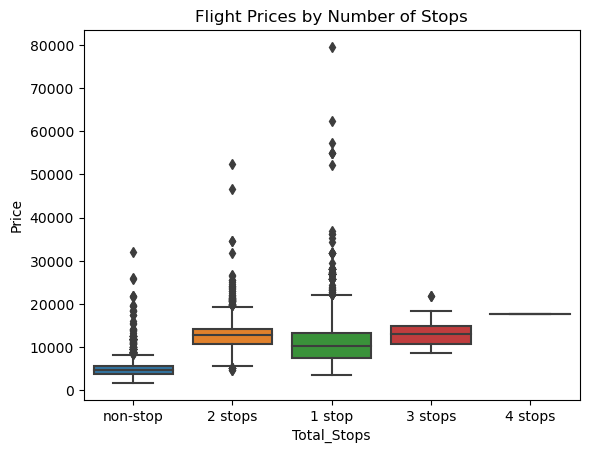

In [30]:
# Analyze prices by number of stops
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Flight Prices by Number of Stops')
plt.show()



Google Playstore:

9.  Load the Google Playstore dataset and examine its dimensions. How many rows and columns does 
the dataset have?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [32]:
df1=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
df1.shape

(10841, 13)

10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different 
app categories.

In [34]:
df1.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<AxesSubplot: >

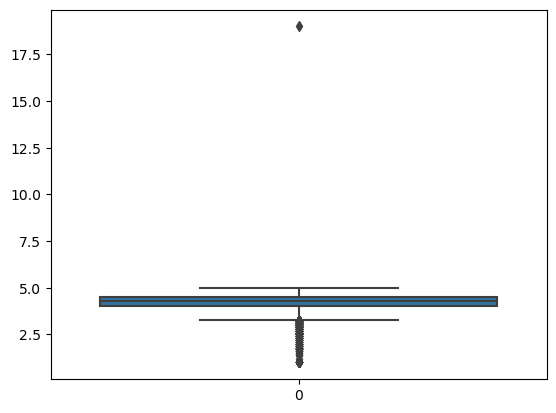

In [36]:
sns.boxplot(df1['Rating'])

In [37]:
# filling the null values in Rating with median value

median_rating = np.nanmedian(df1['Rating'])
df1['Rating'].fillna(median_rating, inplace=True)



In [38]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [39]:
# We can drop rest of the nan values

df1.dropna(inplace=True)

In [40]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [41]:
df1.shape

(10829, 13)

In [42]:
df1.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<AxesSubplot: xlabel='Rating', ylabel='Category'>

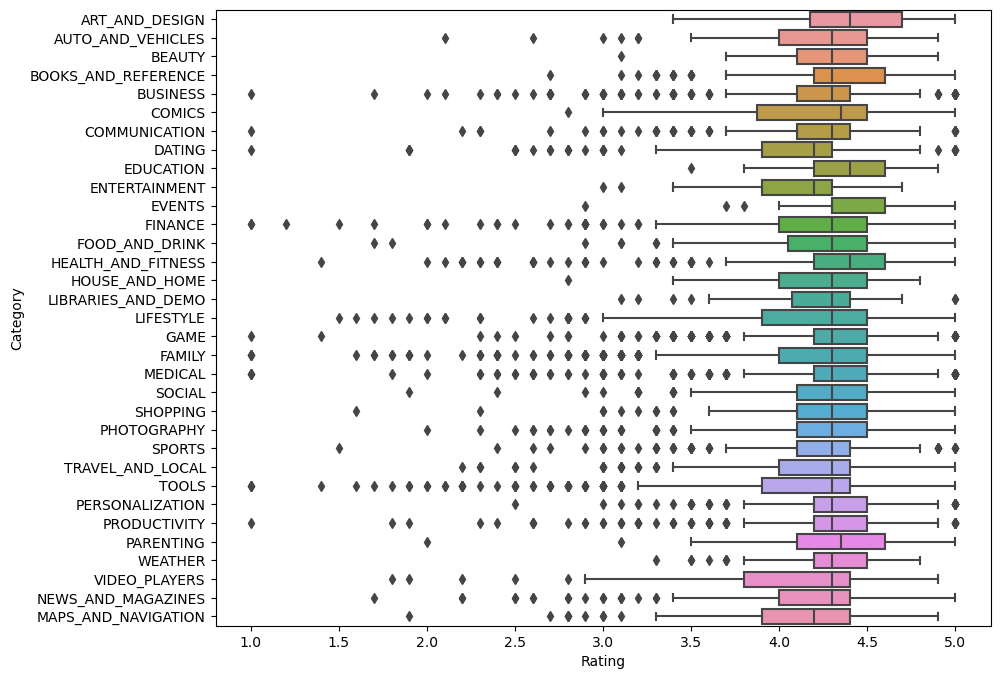

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x='Rating', y='Category', data=df1)


11.  Are there any missing values in the dataset? Identify any missing values and describe how they may 
impact your analysis

Yes there are missing values in the dataset, that are already been imputed with median value above. If not done so they might have impacted our analysis for the rating by category plot.

12.  What is the relationship between the size of an app and its rating? Create a scatter plot to visualize 
the relationship.

In [44]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [46]:
def convert_size(size):
    if size.endswith('M'):
        return float(size[:-1]) * 1000000
    elif size.endswith('k'):
        return float(size[:-1]) * 1000
    else:
        return None

df1['Size'] = df1['Size'].apply(convert_size)


In [47]:
df1[['Rating', 'Size']].corr()


,Rating,Size
Rating,1.000000,0.066021
Size,0.066021,1.000000


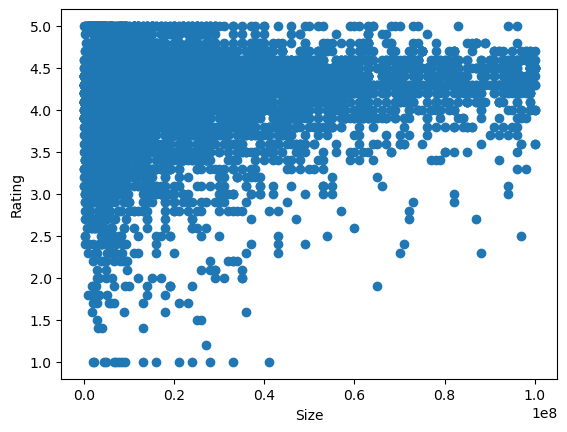

In [48]:

plt.scatter(df1['Size'], df1['Rating'])
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()


As the size increases rating of the app also increases.

13. How does the type of app affect its price? Create a bar chart to compare average prices by app type

In [49]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
df1['Price'] = df1['Price'].str.replace('$','').astype(float)


<AxesSubplot: xlabel='Type', ylabel='Price'>

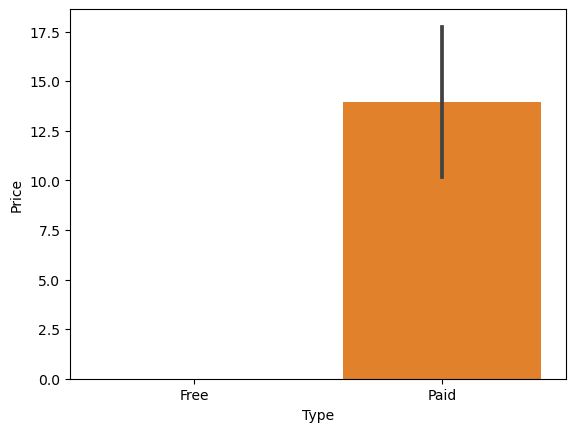

In [51]:
sns.barplot(x='Type', y='Price', data=df1)


14.  What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps 
with the highest number of installs.

In [127]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
df1["Installs"] = df1["Installs"].apply(lambda x: int(x.replace(",", "").replace("+", "")))

In [53]:
# Sort the dataframe by number of installs in descending order
df1 = df1.sort_values("Installs", ascending=False)

In [54]:
# Get the top 10 apps based on number of installs
top_10_apps = df1.head(10)
top_10_apps[['App','Installs']]

,App,Installs
391,Skype - free IM & video calls,1000000000
1872,Subway Surfers,1000000000
4104,Messenger – Text and Video Chat for Free,1000000000
3736,Google News,1000000000
3687,Google Play Movies & TV,1000000000
3665,YouTube,1000000000
2611,Instagram,1000000000
3565,Google Drive,1000000000
5395,Google Photos,1000000000
2604,Instagram,1000000000


In [55]:
# Create a frequency table for the top 10 apps
freq_table = top_10_apps["App"].value_counts().to_frame().reset_index().rename(columns={"index":"App","App":"Frequency"})

# Print the frequency table
print(freq_table)

                                        App  Frequency
0                                 Instagram          2
1             Skype - free IM & video calls          1
2                            Subway Surfers          1
3  Messenger – Text and Video Chat for Free          1
4                               Google News          1
5                   Google Play Movies & TV          1
6                                   YouTube          1
7                              Google Drive          1
8                             Google Photos          1


15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the 
Google Playstore dataset to identify the most popular app categories. How would you approach this 
task, and what features would you analyze to make recommendations to the company?

In [56]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


In [63]:
# Identify the categories with the most number of apps
top_categories = df1['Category'].value_counts().head(10)

In [64]:
top_categories

FAMILY             1968
GAME               1144
TOOLS               841
MEDICAL             463
BUSINESS            460
PRODUCTIVITY        424
PERSONALIZATION     390
COMMUNICATION       387
SPORTS              384
LIFESTYLE           382
Name: Category, dtype: int64

In [66]:
# Identify the categories with the most number of installs
installs_by_category = df1.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).head(10)

In [67]:
installs_by_category

Category
GAME                  35086024415
COMMUNICATION         32647276251
PRODUCTIVITY          14176091369
SOCIAL                14069867902
TOOLS                 11452271905
FAMILY                10258203405
PHOTOGRAPHY           10088247655
NEWS_AND_MAGAZINES     7496317760
TRAVEL_AND_LOCAL       6868887146
VIDEO_PLAYERS          6222002720
Name: Installs, dtype: int64

In [69]:
# Identify the categories with the highest average ratings
avg_rating_by_category = df1.groupby(['Category'])['Rating'].mean().sort_values(ascending=False).head(10)


In [70]:
avg_rating_by_category

Category
EVENTS                 4.395313
EDUCATION              4.388462
ART_AND_DESIGN         4.373437
BOOKS_AND_REFERENCE    4.335652
PERSONALIZATION        4.328205
PARENTING              4.300000
GAME                   4.286888
BEAUTY                 4.283019
HEALTH_AND_FITNESS     4.280059
SHOPPING               4.263077
Name: Rating, dtype: float64

16. A mobile app development company wants to analyze the Google Playstore dataset to identify the 
most successful app developers. What features would you analyze to make recommendations to the 
company, and what data visualizations would you use to present your findings

In [71]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


In [72]:
avg_rating_by_Android_Ver = df1.groupby(['Android Ver'])['Rating'].mean().sort_values(ascending=False).head(10)


In [73]:
avg_rating_by_Android_Ver

Android Ver
7.0 - 7.1.1           4.500000
5.0 - 8.0             4.500000
5.0 - 6.0             4.500000
2.0 and up            4.361290
5.1 and up            4.350000
4.4W and up           4.341667
2.0.1 and up          4.328571
2.2 - 7.1.1           4.300000
5.0 - 7.1.1           4.300000
Varies with device    4.278031
Name: Rating, dtype: float64

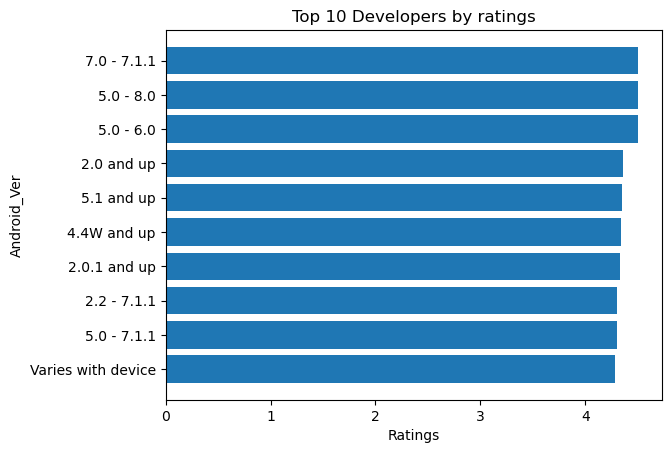

In [76]:
plt.barh(avg_rating_by_Android_Ver.index, avg_rating_by_Android_Ver.values)
plt.title('Top 10 Developers by ratings')
plt.xlabel('Ratings')
plt.ylabel('Android_Ver')
plt.gca().invert_yaxis()  # Invert the y-axis to show the developers in descending order
plt.show()

17.  A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to 
launch a new app. What features would you analyze to make recommendations to the company, and 
what data visualizations would you use to present your findings?

In [77]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device


In [79]:
df1.groupby('Last Updated')['Installs'].sum()


Last Updated
April 1, 2016        21005000
April 1, 2017         1555000
April 1, 2018          121100
April 10, 2013            100
April 10, 2014          50000
                       ...   
September 8, 2016      110000
September 8, 2017     7110000
September 9, 2015      500000
September 9, 2016     1001000
September 9, 2017        1000
Name: Installs, Length: 1376, dtype: int64

In [81]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 391 to 9917
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


In [84]:
# convert the 'date' column to datetime
df1['Last Updated'] = pd.to_datetime(df1['Last Updated'], format='%B %d, %Y')


In [86]:
# extract the month from the 'date' column
df1['month'] = df1['Last Updated'].dt.month

In [87]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,month
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,8
1872,Subway Surfers,GAME,4.5,27725352,76000000.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,7
4104,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,8
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635,13000000.0,1000000000,Free,0.0,Teen,News & Magazines,2018-08-01,5.2.0,4.4 and up,8
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-06,Varies with device,Varies with device,8


In [99]:
df1.groupby('month')['Installs'].sum()


month
1      1186498286
2      1016961455
3      1186018825
4      2893804919
5      6231815327
6      8186202674
7     74442910569
8     68668379529
9       460172325
10      590374124
11     1618368197
12     1150350147
Name: Installs, dtype: int64

<AxesSubplot: xlabel='month', ylabel='Installs'>

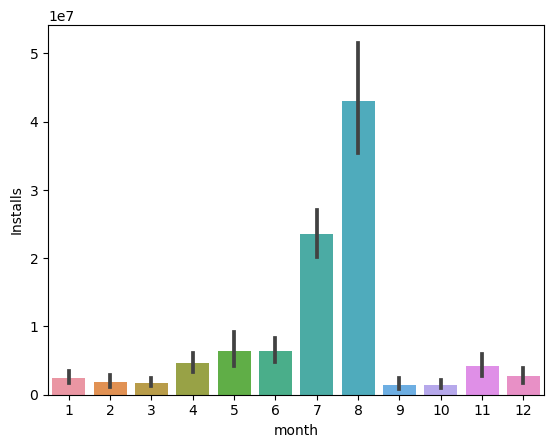

In [91]:
sns.barplot(x='month',y='Installs',data=df1)